# ELG7186 - Fall 2022 - Assignment 2
## Due: <strong>Wednesday November 2<sup>th</sup> 2022 -- 11:59pm</strong>

"
The purpose of this assignment is to gain experience building and training neural networks. You will learn:
- Design and train a fully-connected neural network
- Train an existing CNN architecture using fine-tuning
- Visualize the trained model


### Submission Details
Submit your Jupyter notebook .ipynb file using Brightspace. Do not include any other files or images as they will not be reviewed.
<p>
<strong>Make certain that you run all the cells in the notebook you submit</strong> or you will loose marks.
</p>
<ul>
<li>You can submit multiple times, but only the most recent submission will be saved</li>
<li>Do not wait until the last minute to submit in case you have an unexpected issue</li>
<li>Review the late policy in the syllabus</li>
<li><strong>You must submit your own work</strong> and abide by the University of Ottawa policy on plagiarism and fraud</li>
</ul>


### DO NOT submit any images from the dataset

## Part 0. Data Preparation

To complete the assignment you will download the Caltech Bird dataset and devise an appropriate training set split. <b>You are free to sample from the dataset to reduce the overal training samples depending on your access to compute.</b> Again, the overall accuracy is less important than your  observations and comparisons.

Dataset: <a href="http://www.vision.caltech.edu/visipedia/CUB-200-2011.html">Caltech-UCSD Birds-200-2011</a> (Also posed on Brightspace)

The dataset contains annotations for various tasks. In this assignment you will use the categories for classification (species labels)

In this section:
<ul>
<li>Download the dataset as described above</li>
<li>Create your splits for your dataset (there is a split provided for the full dataset) </li>
<li>Visualize five samples of each class by plotting a grid using the matplotlib library.</li>
</ul>


In [1]:
from keras_preprocessing.image import ImageDataGenerator

In [2]:
batch_size=32

In [4]:
train_datagen=ImageDataGenerator(validation_split=0.3)
train_generator=train_datagen.flow_from_directory(
directory='CUB_200_2011\images',
class_mode='categorical',
batch_size=batch_size,
subset='training',
target_size=(32,32),
color_mode="rgb"
)


validation_generator=train_datagen.flow_from_directory(
directory='CUB_200_2011\images',
class_mode='categorical',
subset='validation',
target_size=(32,32),
color_mode="rgb",
batch_size=batch_size
)

Found 8284 images belonging to 200 classes.
Found 3504 images belonging to 200 classes.


In [5]:
type(train_generator)

keras_preprocessing.image.directory_iterator.DirectoryIterator

In [4]:
import matplotlib.pyplot as plt
import os
import cv2
import  random
random.seed(43)

In [10]:
images=r'C:\Users\nadai\PycharmProjects\Visiion\CUB_200_2011\images'
samples=[]
for i in (os.listdir(images)):
    path=os.path.join(images,i)
    for c,x in  enumerate(os.listdir(path)):
        new_path=os.path.join(path,x)
        if c ==5:
         break;
        img=cv2.imread(new_path)
        img=cv2.resize(img,(224,224))
        samples.append(img)


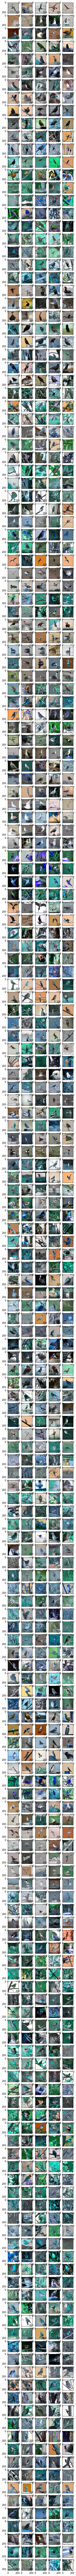

In [11]:
def draw_func(list_of_imgs):
  fig, axs = plt.subplots(200, 5,figsize=(5, 200))

  for i,ax in  enumerate (axs.flatten()):
    ax.imshow(list_of_imgs[i])
plt.show()

draw_func(samples)

## Part 1. Perceptron (3 Marks)
For this section you will implement a fully connected neural network (multi-layer perceptron). To do this you will need to perform the following steps:
- Resize the images to be no larger than 32x32.
- Use the sequential model API in keras to build your network using dense layers (consider performance impacts of fully connected layers)
- You must decide an appropriate number of neurons and layers.
- Print a summary of your model configuration.


When your classifier is working:
- Plot a loss curve for training and test data
- Plot an accuracy curve for training and test data
- Provide a brief discussion of your results

In [6]:
import tensorflow as tf
from keras.models import Sequential


In [7]:
from keras.layers import Dense,Activation,Flatten,Dropout

In [14]:
model=tf.keras.Sequential([
# tf.keras.layers.Flatten(data_format=None),
# tf.keras.layers.Dense.Flatten(),
tf.keras.layers.Dense(64,input_shape=(32,32,3),activation="relu"),
tf.keras.layers.Flatten(data_format=None),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Dense(64,activation="relu"),
tf.keras.layers.Dense(64,activation="relu"),
tf.keras.layers.Dense(74,activation="relu"),
tf.keras.layers.Dense(96,activation="relu"),
tf.keras.layers.Dense(64,activation="relu"),
tf.keras.layers.Dense(64,activation="relu"),
tf.keras.layers.Dense(72,activation="relu"),
tf.keras.layers.Dense(64,activation="relu"),
tf.keras.layers.Dense(69,activation="relu"),
tf.keras.layers.Dense(64,activation="relu"),
tf.keras.layers.Dense(200,activation="softmax")
])

In [15]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [16]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32, 32, 64)        256       
                                                                 
 flatten (Flatten)           (None, 65536)             0         
                                                                 
 batch_normalization (BatchN  (None, 65536)            262144    
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 64)                4194368   
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 74)                4810      
                                                        

In [13]:
from livelossplot import PlotLossesKeras

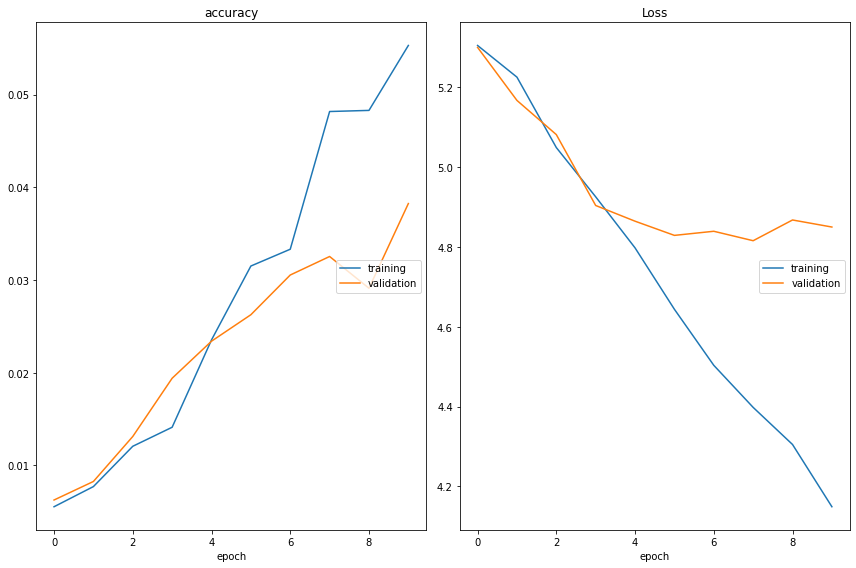

accuracy
	training         	 (min:    0.006, max:    0.055, cur:    0.055)
	validation       	 (min:    0.006, max:    0.038, cur:    0.038)
Loss
	training         	 (min:    4.149, max:    5.305, cur:    4.149)
	validation       	 (min:    4.816, max:    5.300, cur:    4.850)
116/116 [==============================] - 26s 226ms/step - loss: 4.1488 - accuracy: 0.0553 - val_loss: 4.8501 - val_accuracy: 0.0382


In [18]:
history=model.fit(train_generator,epochs=10,callbacks=[PlotLossesKeras()],validation_data=validation_generator)


In [19]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [20]:
pred=model.predict_generator(validation_generator,
)

C:\Users\nadai\AppData\Local\Temp\ipykernel_6924\686842159.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred=model.predict_generator(validation_generator,


In [8]:
import numpy as np
import pandas as pd

In [23]:
predicted_class_indices=np.argmax(pred,axis=1)

In [24]:
predicted_class_indices

array([ 70,  48,  38, ..., 108,  21,  83], dtype=int64)

In [25]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

In [26]:
filenames=validation_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})

In [27]:
results

Filename  \
0     001.Black_footed_Albatross\Black_Footed_Albatr...   
1     001.Black_footed_Albatross\Black_Footed_Albatr...   
2     001.Black_footed_Albatross\Black_Footed_Albatr...   
3     001.Black_footed_Albatross\Black_Footed_Albatr...   
4     001.Black_footed_Albatross\Black_Footed_Albatr...   
...                                                 ...   
3499  200.Common_Yellowthroat\Common_Yellowthroat_00...   
3500  200.Common_Yellowthroat\Common_Yellowthroat_00...   
3501  200.Common_Yellowthroat\Common_Yellowthroat_00...   
3502  200.Common_Yellowthroat\Common_Yellowthroat_00...   
3503  200.Common_Yellowthroat\Common_Yellowthroat_00...   

                          Predictions  
0              071.Long_tailed_Jaeger  
1             049.Boat_tailed_Grackle  
2                039.Least_Flycatcher  
3             161.Blue_winged_Warbler  
4     160.Black_throated_Blue_Warbler  
...                               ...  
3499             039.Least_Flycatcher  
3500    083.White_breasted_Kingfisher  
3501            109.American_Redstart  
3502             022.Chuck_will_Widow  
3503         084.Red_legged_Kittiwake  

[3504 rows x 2 columns]

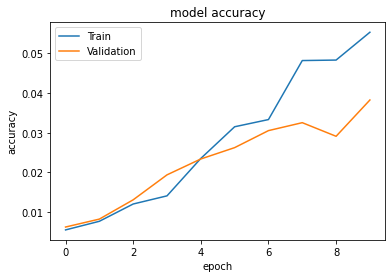

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

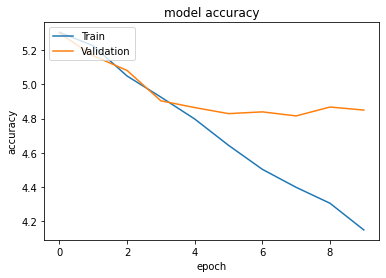

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

The Result of the model appear that  the model  underfitting  because the accuracy of the training and testing near of  each other
 and the above data frame appear the predicition classes

# Brief Discussion


## Part 2. ResNet-101 (4 Marks)

For this section you will adapt the ResNet-101 network for the current task using tranfer learning and fine-tuning. You will implement the following in your process:
- You should choose a suitable image size.
- Choose a suitable labelling scheme.
- Use the pretrained ResNet-101 network available in Keras.
- Remove the top fully connected layers. Include your own FC layers that match our dataset.
- Choose some layers to "freeze" and the remaining layers you will fine-tune with the new dataset.

### Step 1
You will use the above steps to train a ResNet-101 model using the Bird dataset
- Use transfer learning to train your first model by removing the FC layers, but leaving the other layers intact.
- Plot a loss curve for training and test data
- Plot an accuracy curve for training and test data

### Step 2
Now use the same steps as above, but this time D. Again, plot your results.

### Step 3
Discuss the results of both methods from step 1 and step 2 while using plots and graphics to support your discussion.

In [9]:
import keras

In [10]:
# Step 1 Remove fc layers & freeze layers and the remaning layers fine tune
model_ff=tf.keras.applications.resnet.ResNet101(
    include_top=False,#to remove fully-connected
    weights='imagenet',
    input_tensor=None,
    input_shape=(32,32,3),
    pooling=None)

model_ff.trainable=False
x=model_ff.output
x=Flatten()(x)
x=Dropout(0.2)(x)
x=Dense(72, activation="relu")(x)
x=Dense(200, activation='softmax')(x)

model_Resnet101 = keras.Model(model_ff.input,x)
model_Resnet101.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                                                                                              

In [32]:
model_ff.summary()# before freezing

Model: "resnet101"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                          

In [29]:
model_Resnet101.summary() #after freezing

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [33]:
model_Resnet101.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

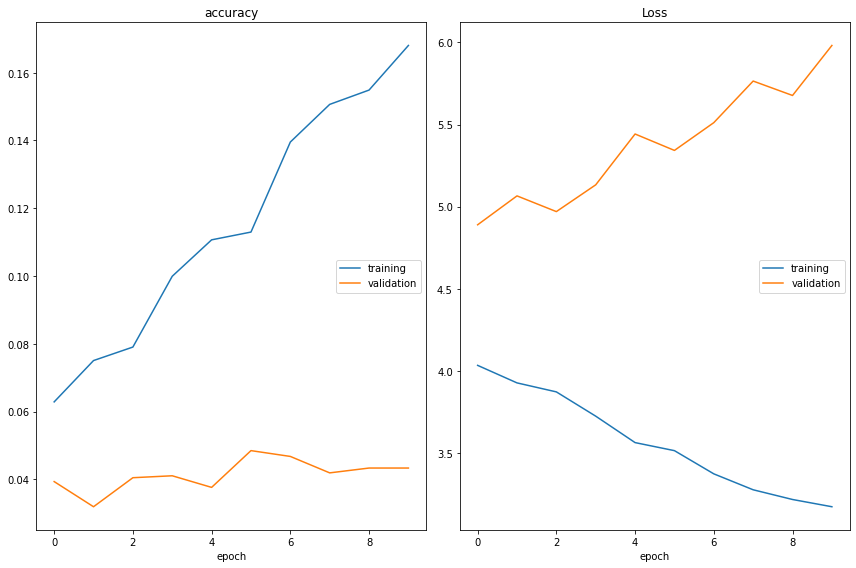

accuracy
	training         	 (min:    0.063, max:    0.168, cur:    0.168)
	validation       	 (min:    0.032, max:    0.049, cur:    0.043)
Loss
	training         	 (min:    3.174, max:    4.034, cur:    3.174)
	validation       	 (min:    4.890, max:    5.981, cur:    5.981)
116/116 [==============================] - 28s 240ms/step - loss: 3.1736 - accuracy: 0.1680 - val_loss: 5.9815 - val_accuracy: 0.0434


In [34]:
history_Resnet101=model.fit(train_generator,epochs=10,callbacks=[PlotLossesKeras()],validation_data=validation_generator)

In [35]:
history_Resnet101.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

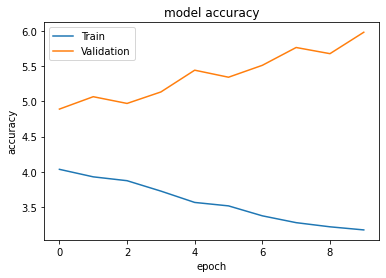

In [36]:
plt.plot(history_Resnet101.history['loss'])
plt.plot(history_Resnet101.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

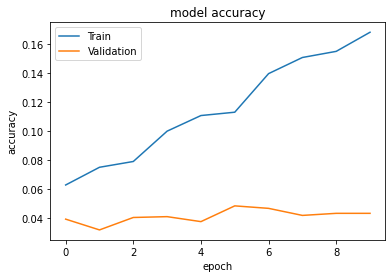

In [37]:
plt.plot(history_Resnet101.history['accuracy'])
plt.plot(history_Resnet101.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

In [8]:
import keras

In [11]:
#step2 Remove layers and unfreeze layers
import tensorflow as tf
from keras.layers import Flatten,Dense,Dropout
model_un=tf.keras.applications.ResNet101(
    include_top=False,#to remove fully-connected
    weights='imagenet',
    input_tensor=None,
    input_shape=(32,32,3),
    pooling=None)
for layer in model_un.layers[:-15]:
    layer.trainable = False

x=model_un.output
x=Flatten()(x)
x=Dense(200, activation='softmax')(x)


In [12]:
model_Resnet101_un= keras.Model(model_un.input,x)

In [13]:
model_Resnet101_un.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                                                                                            

In [16]:
model_Resnet101_un.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [17]:
history_Resnet101_un=model_Resnet101_un.fit(train_generator,epochs=10,validation_data=validation_generator)

Epoch 1/10
259/259 [==============================] - 100s 336ms/step - loss: 6.4994 - accuracy: 0.0324 - val_loss: 5.8246 - val_accuracy: 0.0508
Epoch 2/10
259/259 [==============================] - 29s 113ms/step - loss: 2.9007 - accuracy: 0.3140 - val_loss: 6.0674 - val_accuracy: 0.0462
Epoch 3/10
259/259 [==============================] - 29s 112ms/step - loss: 1.3924 - accuracy: 0.6608 - val_loss: 6.3564 - val_accuracy: 0.0494
Epoch 4/10
259/259 [==============================] - 29s 113ms/step - loss: 0.6176 - accuracy: 0.8690 - val_loss: 6.7257 - val_accuracy: 0.0519
Epoch 5/10
259/259 [==============================] - 29s 113ms/step - loss: 0.2468 - accuracy: 0.9667 - val_loss: 6.9273 - val_accuracy: 0.0539
Epoch 6/10
259/259 [==============================] - 30s 114ms/step - loss: 0.0968 - accuracy: 0.9913 - val_loss: 7.1458 - val_accuracy: 0.0545
Epoch 7/10
259/259 [==============================] - 29s 113ms/step - loss: 0.0379 - accuracy: 0.9976 - val_loss: 7.2970 - val_a

In [19]:
from matplotlib import  pyplot as plt

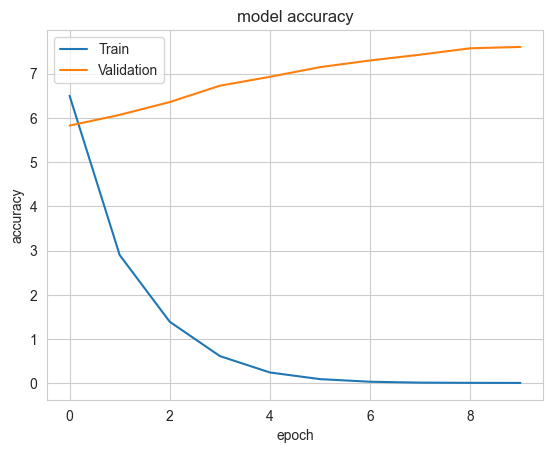

In [20]:
plt.plot(history_Resnet101_un.history['loss'])
plt.plot(history_Resnet101_un.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

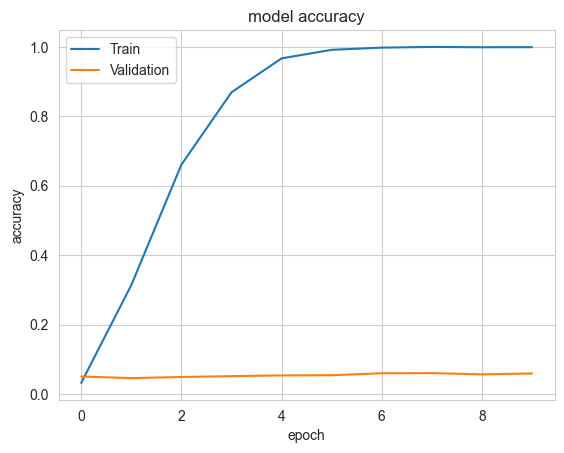

In [21]:
plt.plot(history_Resnet101_un.history['accuracy'])
plt.plot(history_Resnet101_un.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

 After I try   to edit in layer  of Resnet101 to fit with this  dataset with  same weight of Imagenet  because this weight is suitable in our case and the result of accuracy still the same  as we see in graph of loss and accuracy the model overfiting and can't learn any more all class predict its as 2 classes .  if i want high accuracy  i can try another model like vgg16 or resnet 50 because the architecture of this model not suitable  for this case

## Part 3. Visualization (3 Marks)

For this section you will visualize the filters learned byyour ResNet-101 network and use t-SNE to observe clusters that were learned by your model.
- Make sure to provide the graphic results for your visualizations
- Provide an interpretation of the results



In [45]:
for x in model_Resnet101_un.layers:
    print(x.name)

input_2
conv1_pad
conv1_conv
conv1_bn
conv1_relu
pool1_pad
pool1_pool
conv2_block1_1_conv
conv2_block1_1_bn
conv2_block1_1_relu
conv2_block1_2_conv
conv2_block1_2_bn
conv2_block1_2_relu
conv2_block1_0_conv
conv2_block1_3_conv
conv2_block1_0_bn
conv2_block1_3_bn
conv2_block1_add
conv2_block1_out
conv2_block2_1_conv
conv2_block2_1_bn
conv2_block2_1_relu
conv2_block2_2_conv
conv2_block2_2_bn
conv2_block2_2_relu
conv2_block2_3_conv
conv2_block2_3_bn
conv2_block2_add
conv2_block2_out
conv2_block3_1_conv
conv2_block3_1_bn
conv2_block3_1_relu
conv2_block3_2_conv
conv2_block3_2_bn
conv2_block3_2_relu
conv2_block3_3_conv
conv2_block3_3_bn
conv2_block3_add
conv2_block3_out
conv3_block1_1_conv
conv3_block1_1_bn
conv3_block1_1_relu
conv3_block1_2_conv
conv3_block1_2_bn
conv3_block1_2_relu
conv3_block1_0_conv
conv3_block1_3_conv
conv3_block1_0_bn
conv3_block1_3_bn
conv3_block1_add
conv3_block1_out
conv3_block2_1_conv
conv3_block2_1_bn
conv3_block2_1_relu
conv3_block2_2_conv
conv3_block2_2_bn
conv3_

(3, 3, 64, 64)
conv2_block1_2_conv


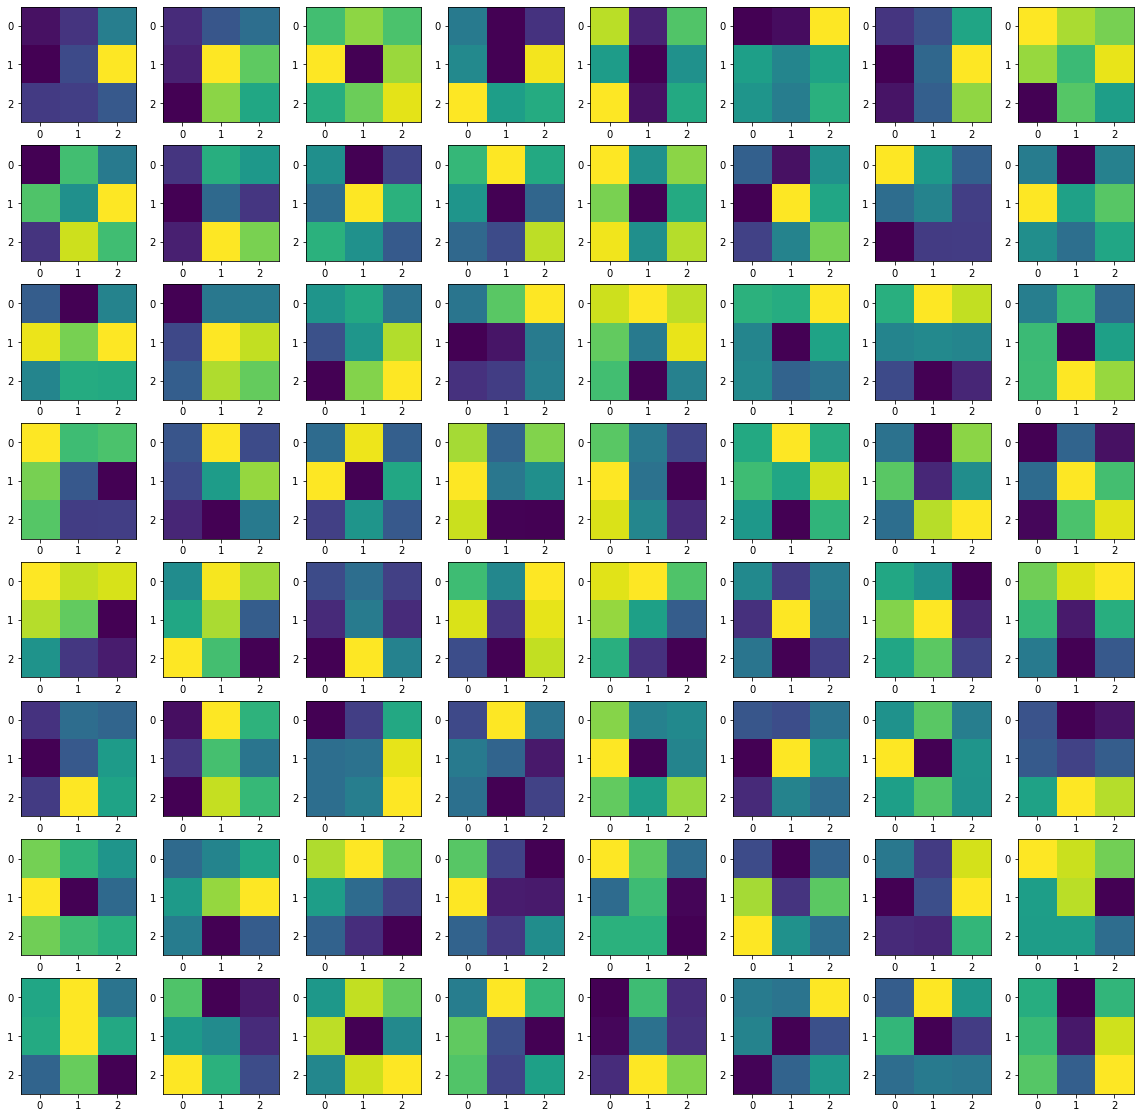

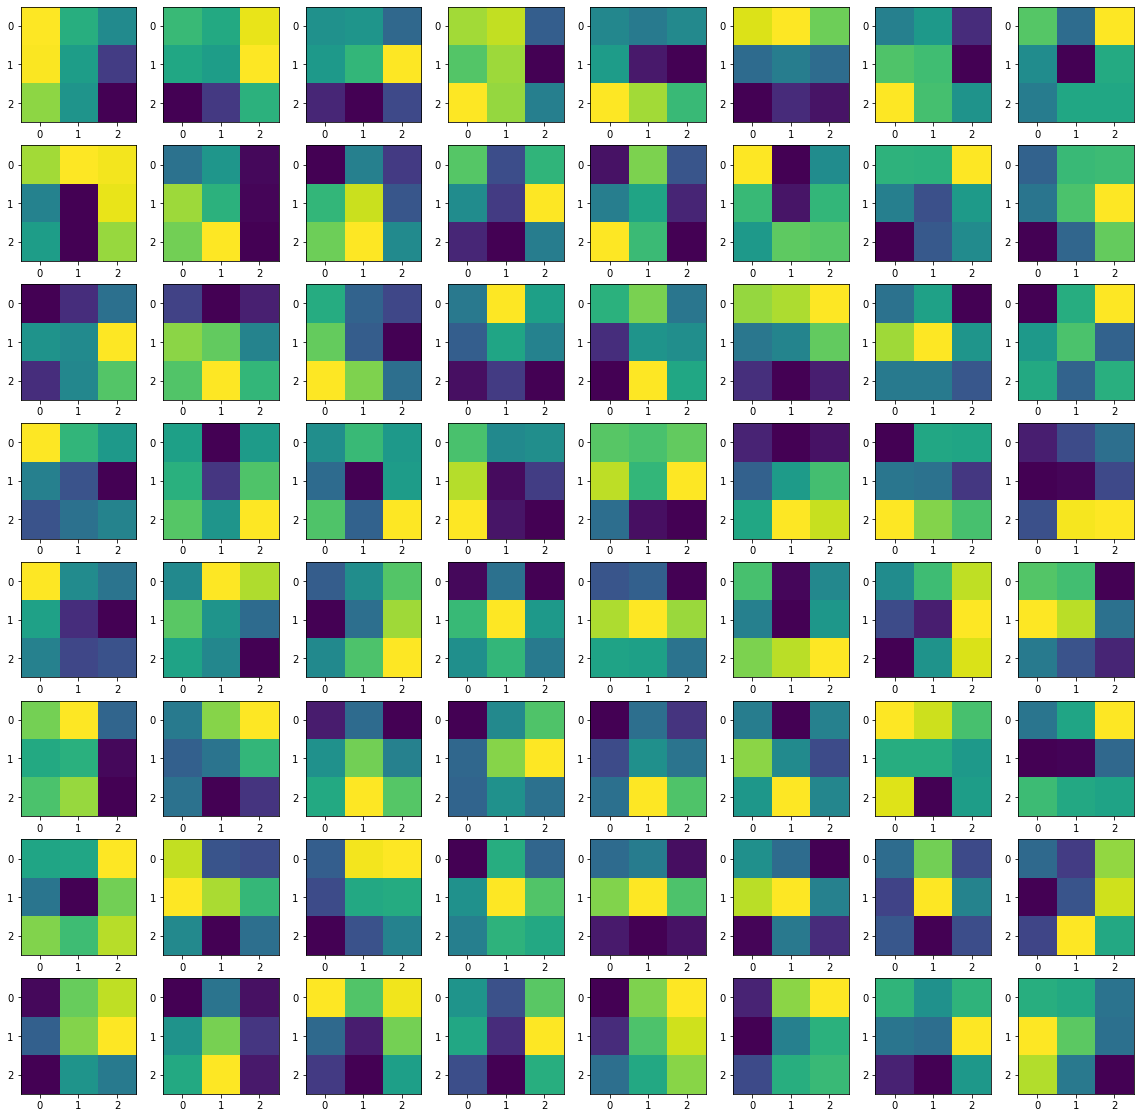

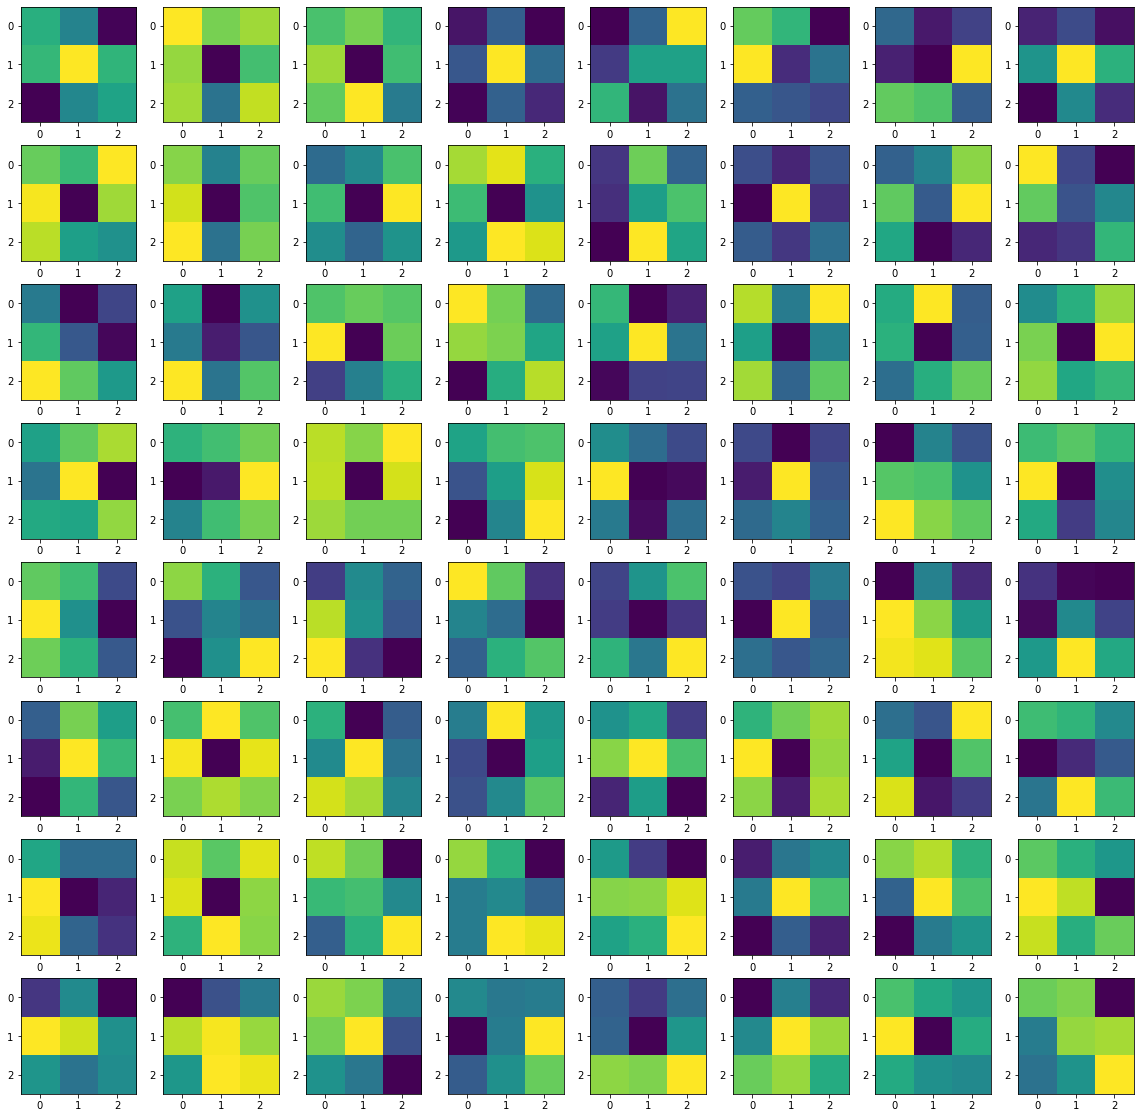

In [46]:
for x in model_Resnet101_un.layers:
     m=False
     if x.name=='conv2_block1_2_conv':
        m=True
        filter=x.get_weights()
        for y in filter:
            print(y.shape)
            print(x.name)
            for channel in range(3):
                fig,axs=plt.subplots(8,8,figsize=(20,20))
                for i , ax in enumerate(axs.flatten()):
                    ax.imshow(y[:,:,channel,i])
            break
     if m==True:
        break



## TSNE

In [47]:
model_Resnet101_un.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [22]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from PIL import Image

In [23]:
batch_size=32

In [25]:
Feature_for_Tsne=keras.Model(model_Resnet101_un.input,(model_Resnet101_un.get_layer("flatten_1")).output)
Feature_for_Tsne=Feature_for_Tsne.predict(validation_generator,batch_size=batch_size)

110/110 [==============================] - 12s 85ms/step


In [38]:
predicted_lebel=model_Resnet101_un.predict(validation_generator,batch_size=batch_size)

110/110 [==============================] - 11s 80ms/step


In [40]:
predicted_lebel=predicted_lebel.argmax(axis=1)
predicted_lebel.shape

(3504,)

<AxesSubplot:>

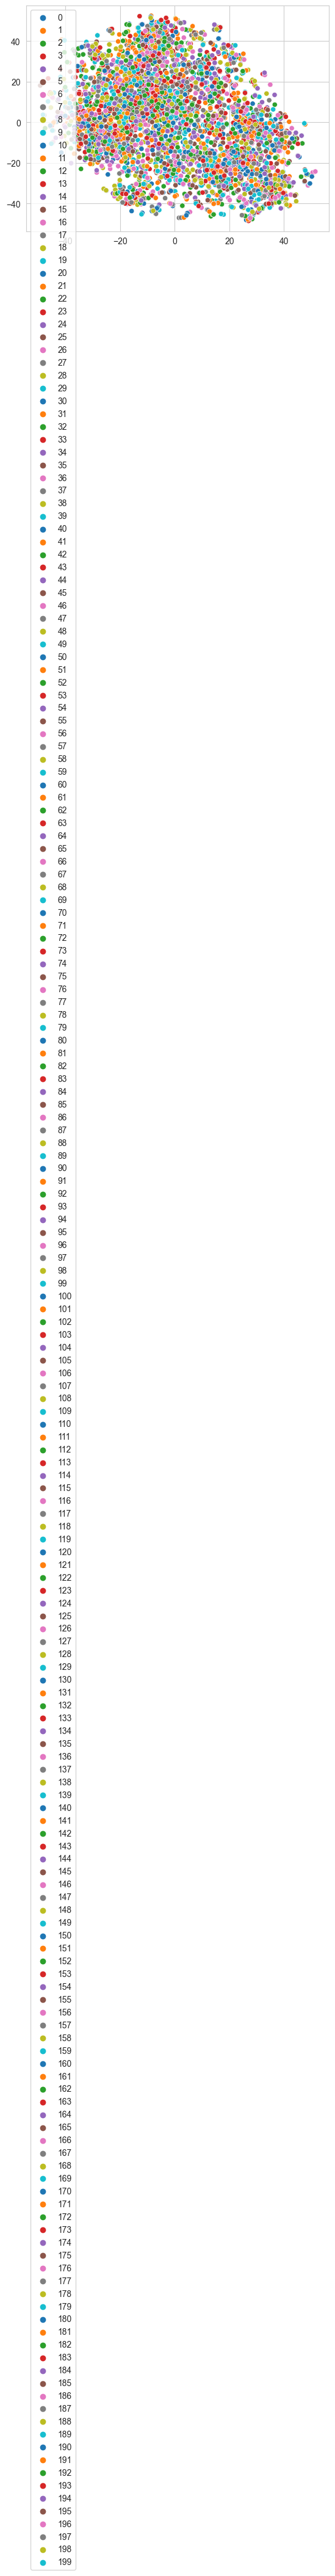

In [43]:
import seaborn as sns
sns.scatterplot(x=tsne[:,0],y=tsne[:,1],hue=predicted_lebel,legend='full',palette='tab10')

Activation  maps  to capture the results of applying filters

## Bonus (1 Mark)
Visualize the activation maps produced by your network and discuss the results using an image from the test test and another image of your choice.

In [45]:
from keract import display_activations, get_activations
from PIL import  Image
import numpy as np
# The image path
image_dir = 'CUB_200_2011/images/001.Black_footed_Albatross/Black_Footed_Albatross_0045_796129.jpg'
# Preprocessing the image for the model
x = Image.open(image_dir)
x=x.resize((32,32))
x=np.array(x)
x=np.expand_dims(x,axis=0)
x=x/255.0
print(x.shape)
# Generate the activations
activations = get_activations(model_Resnet101_un, x)

(1, 32, 32, 3)


input_2 (1, 32, 32, 3) 


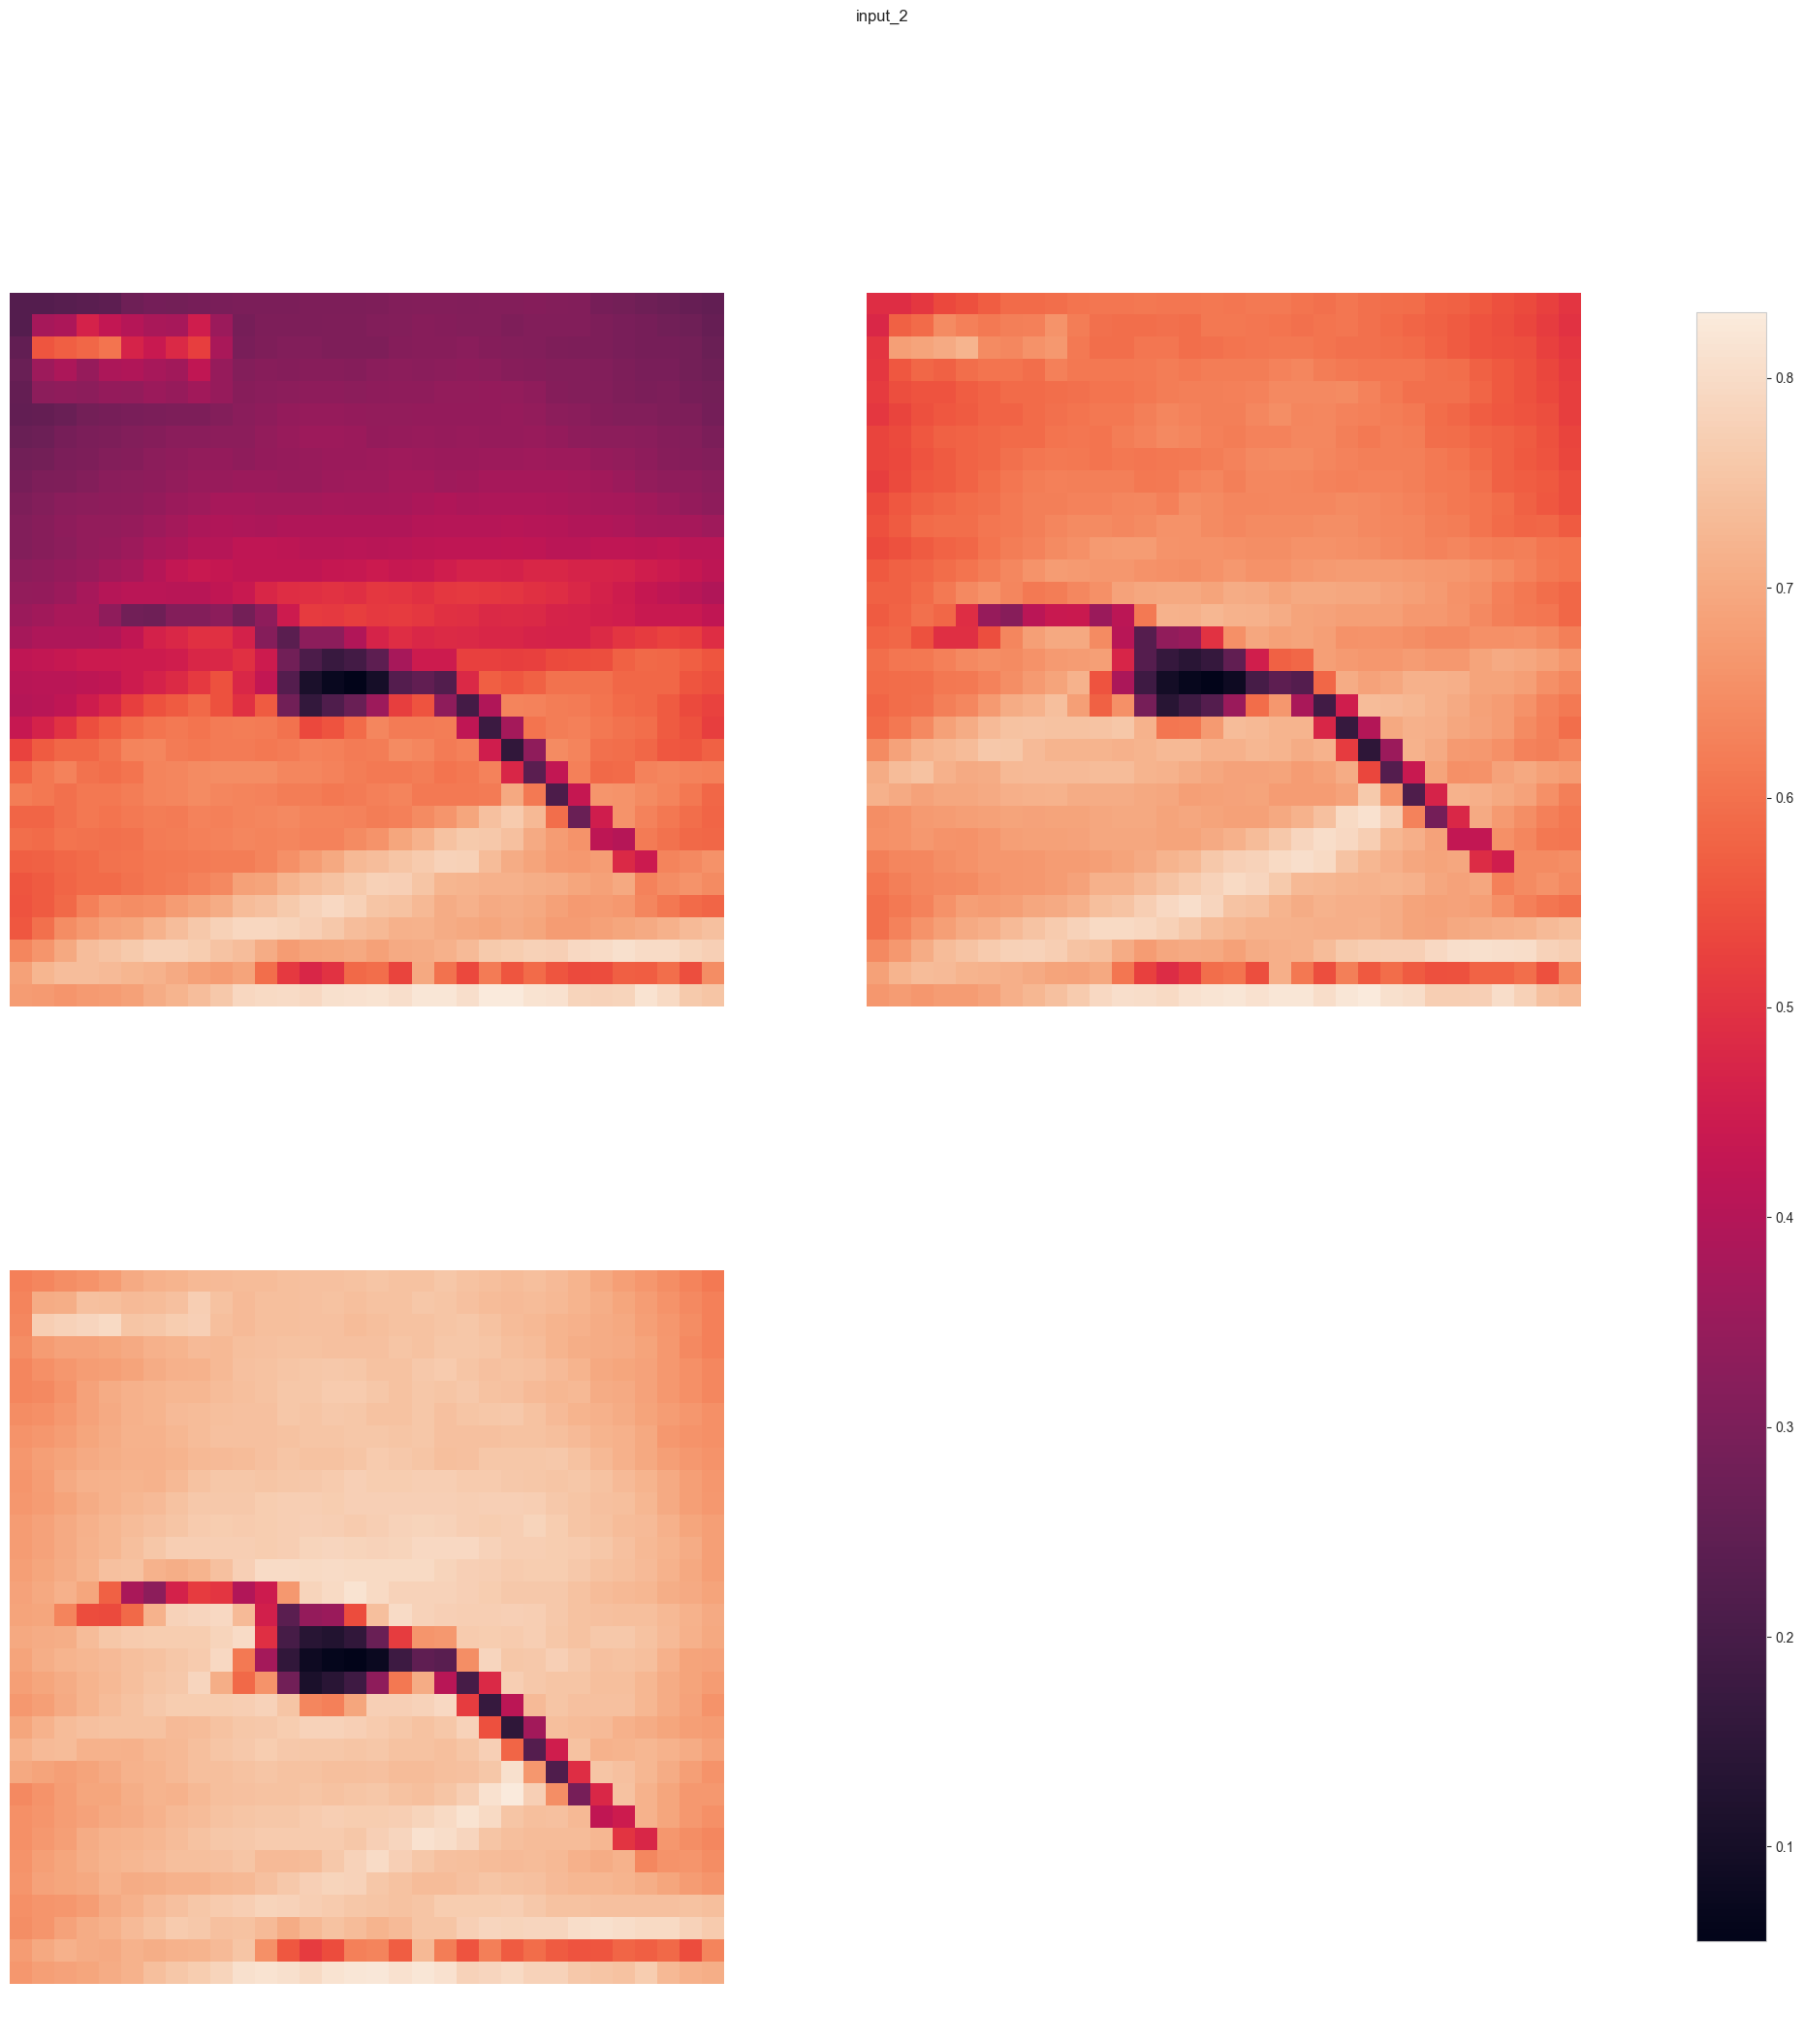

conv1_pad (1, 38, 38, 3) 


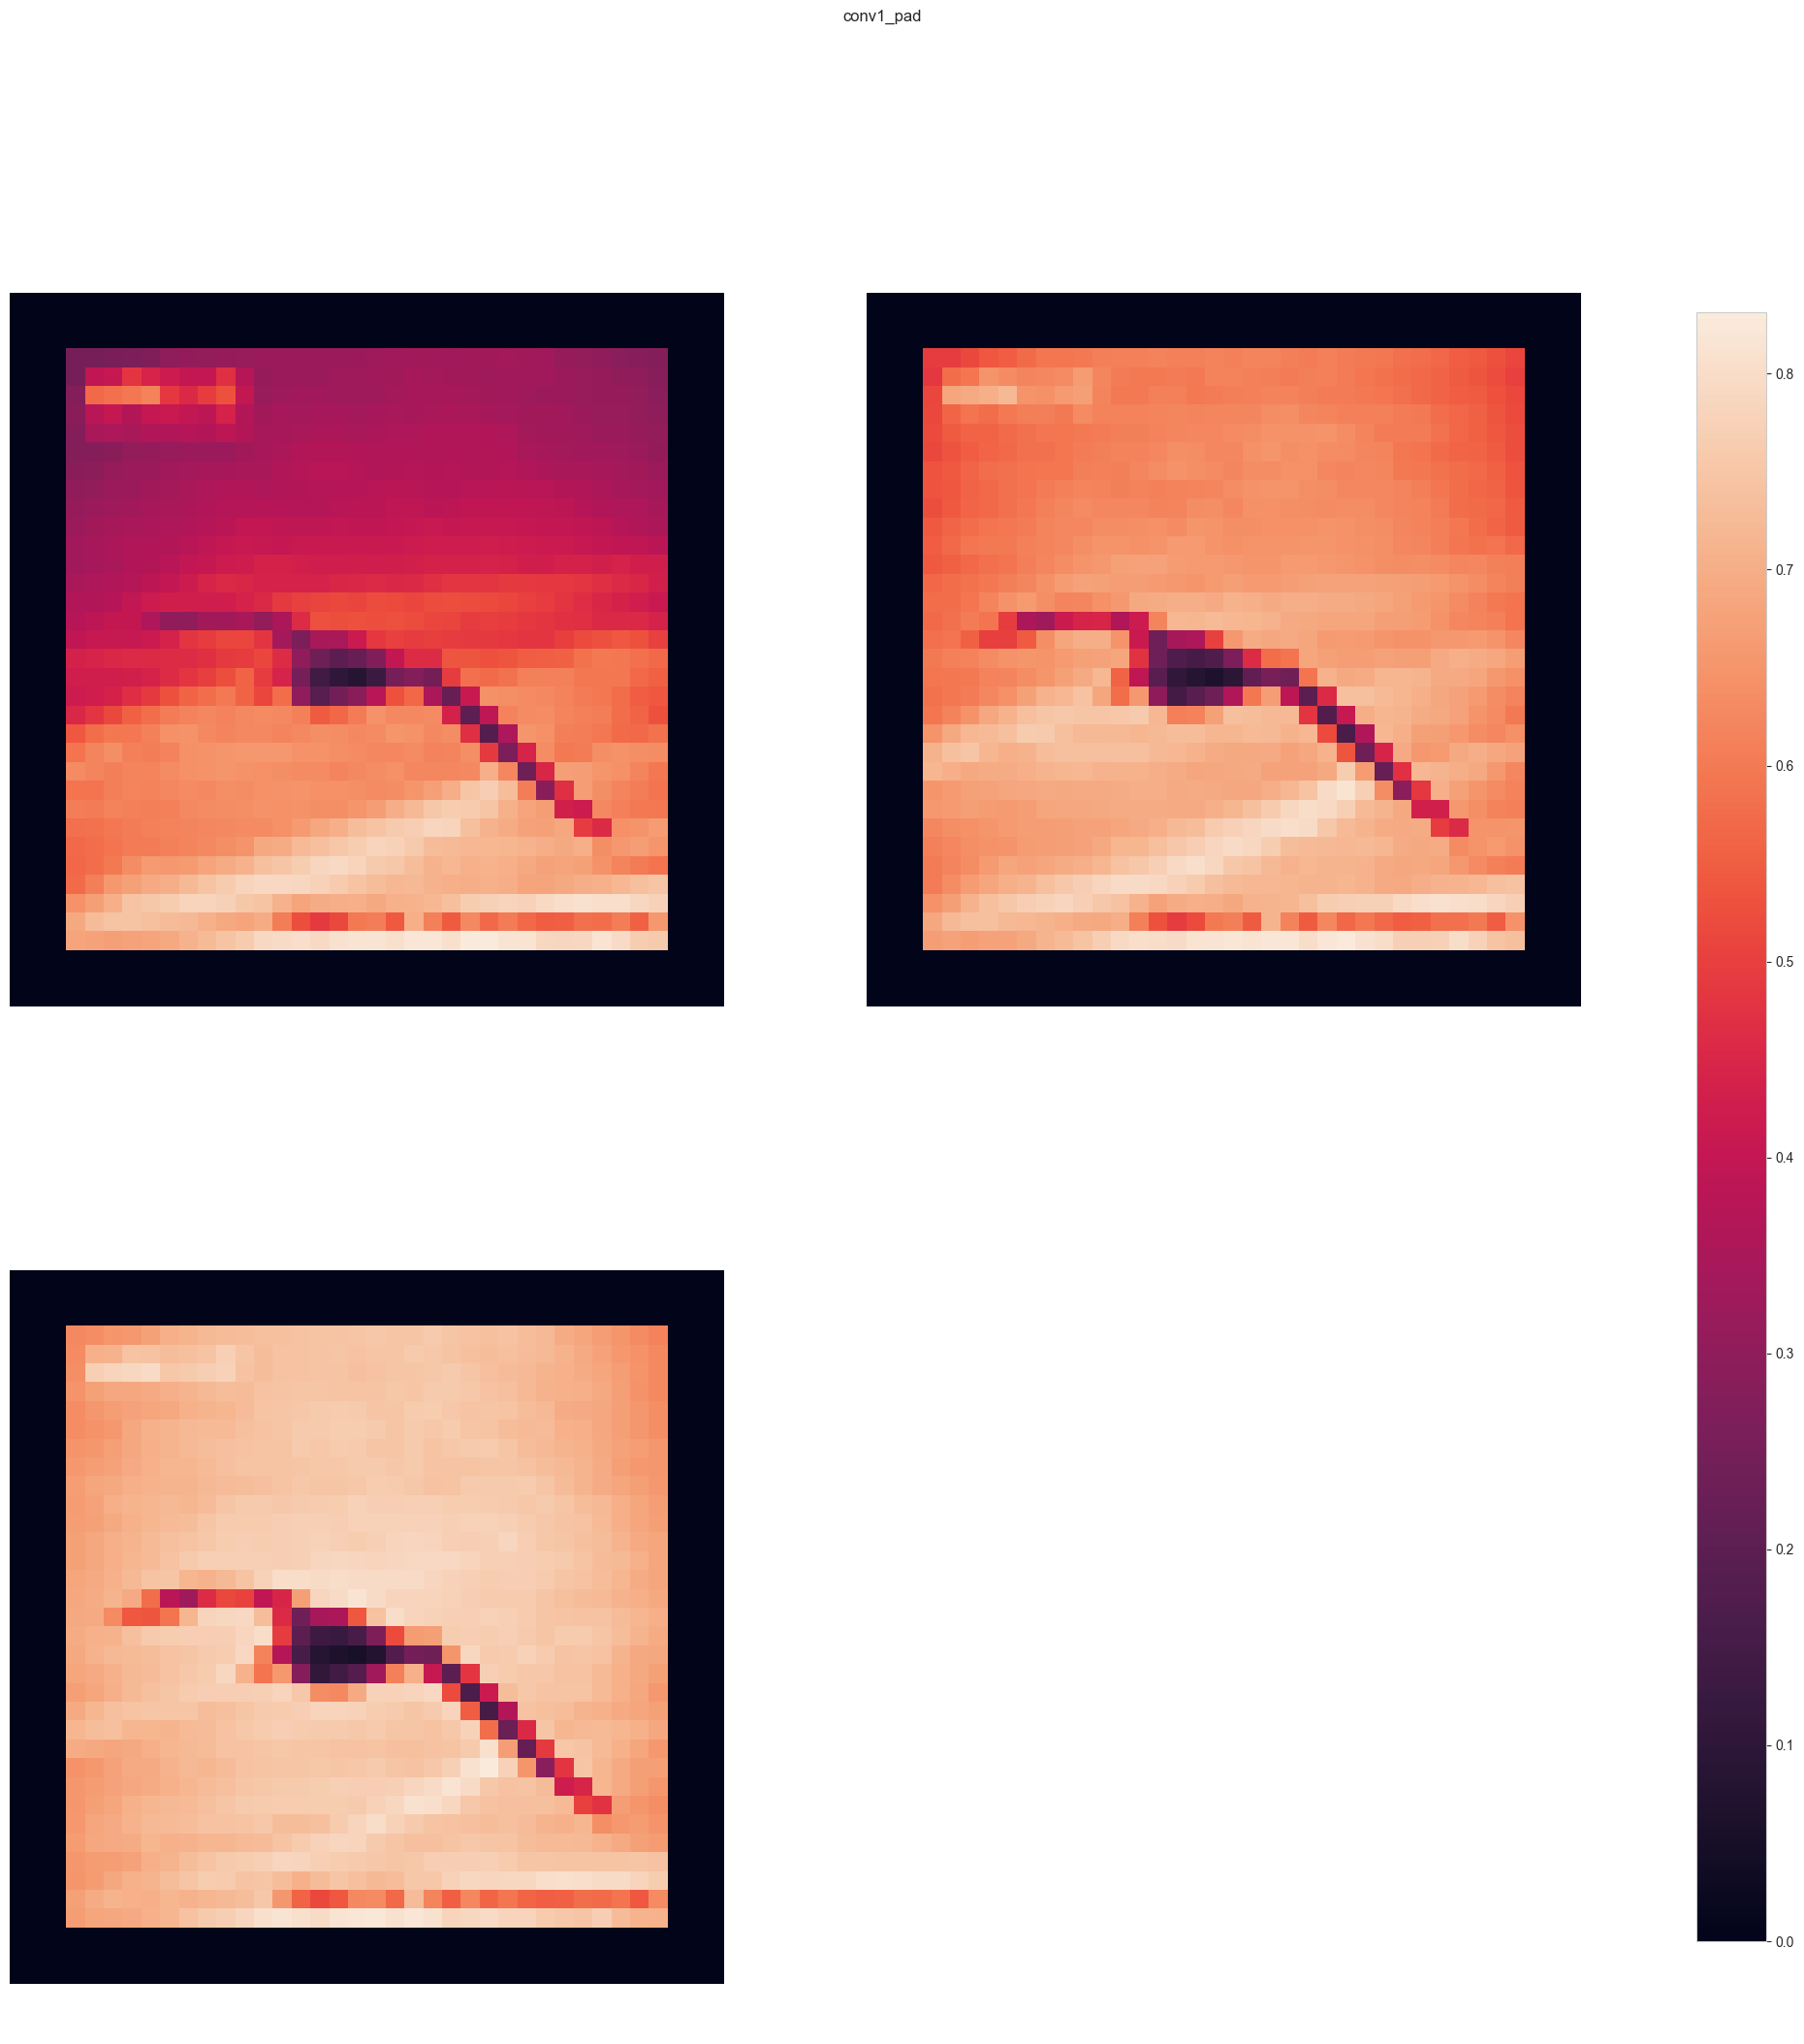

conv1_conv (1, 16, 16, 64) 


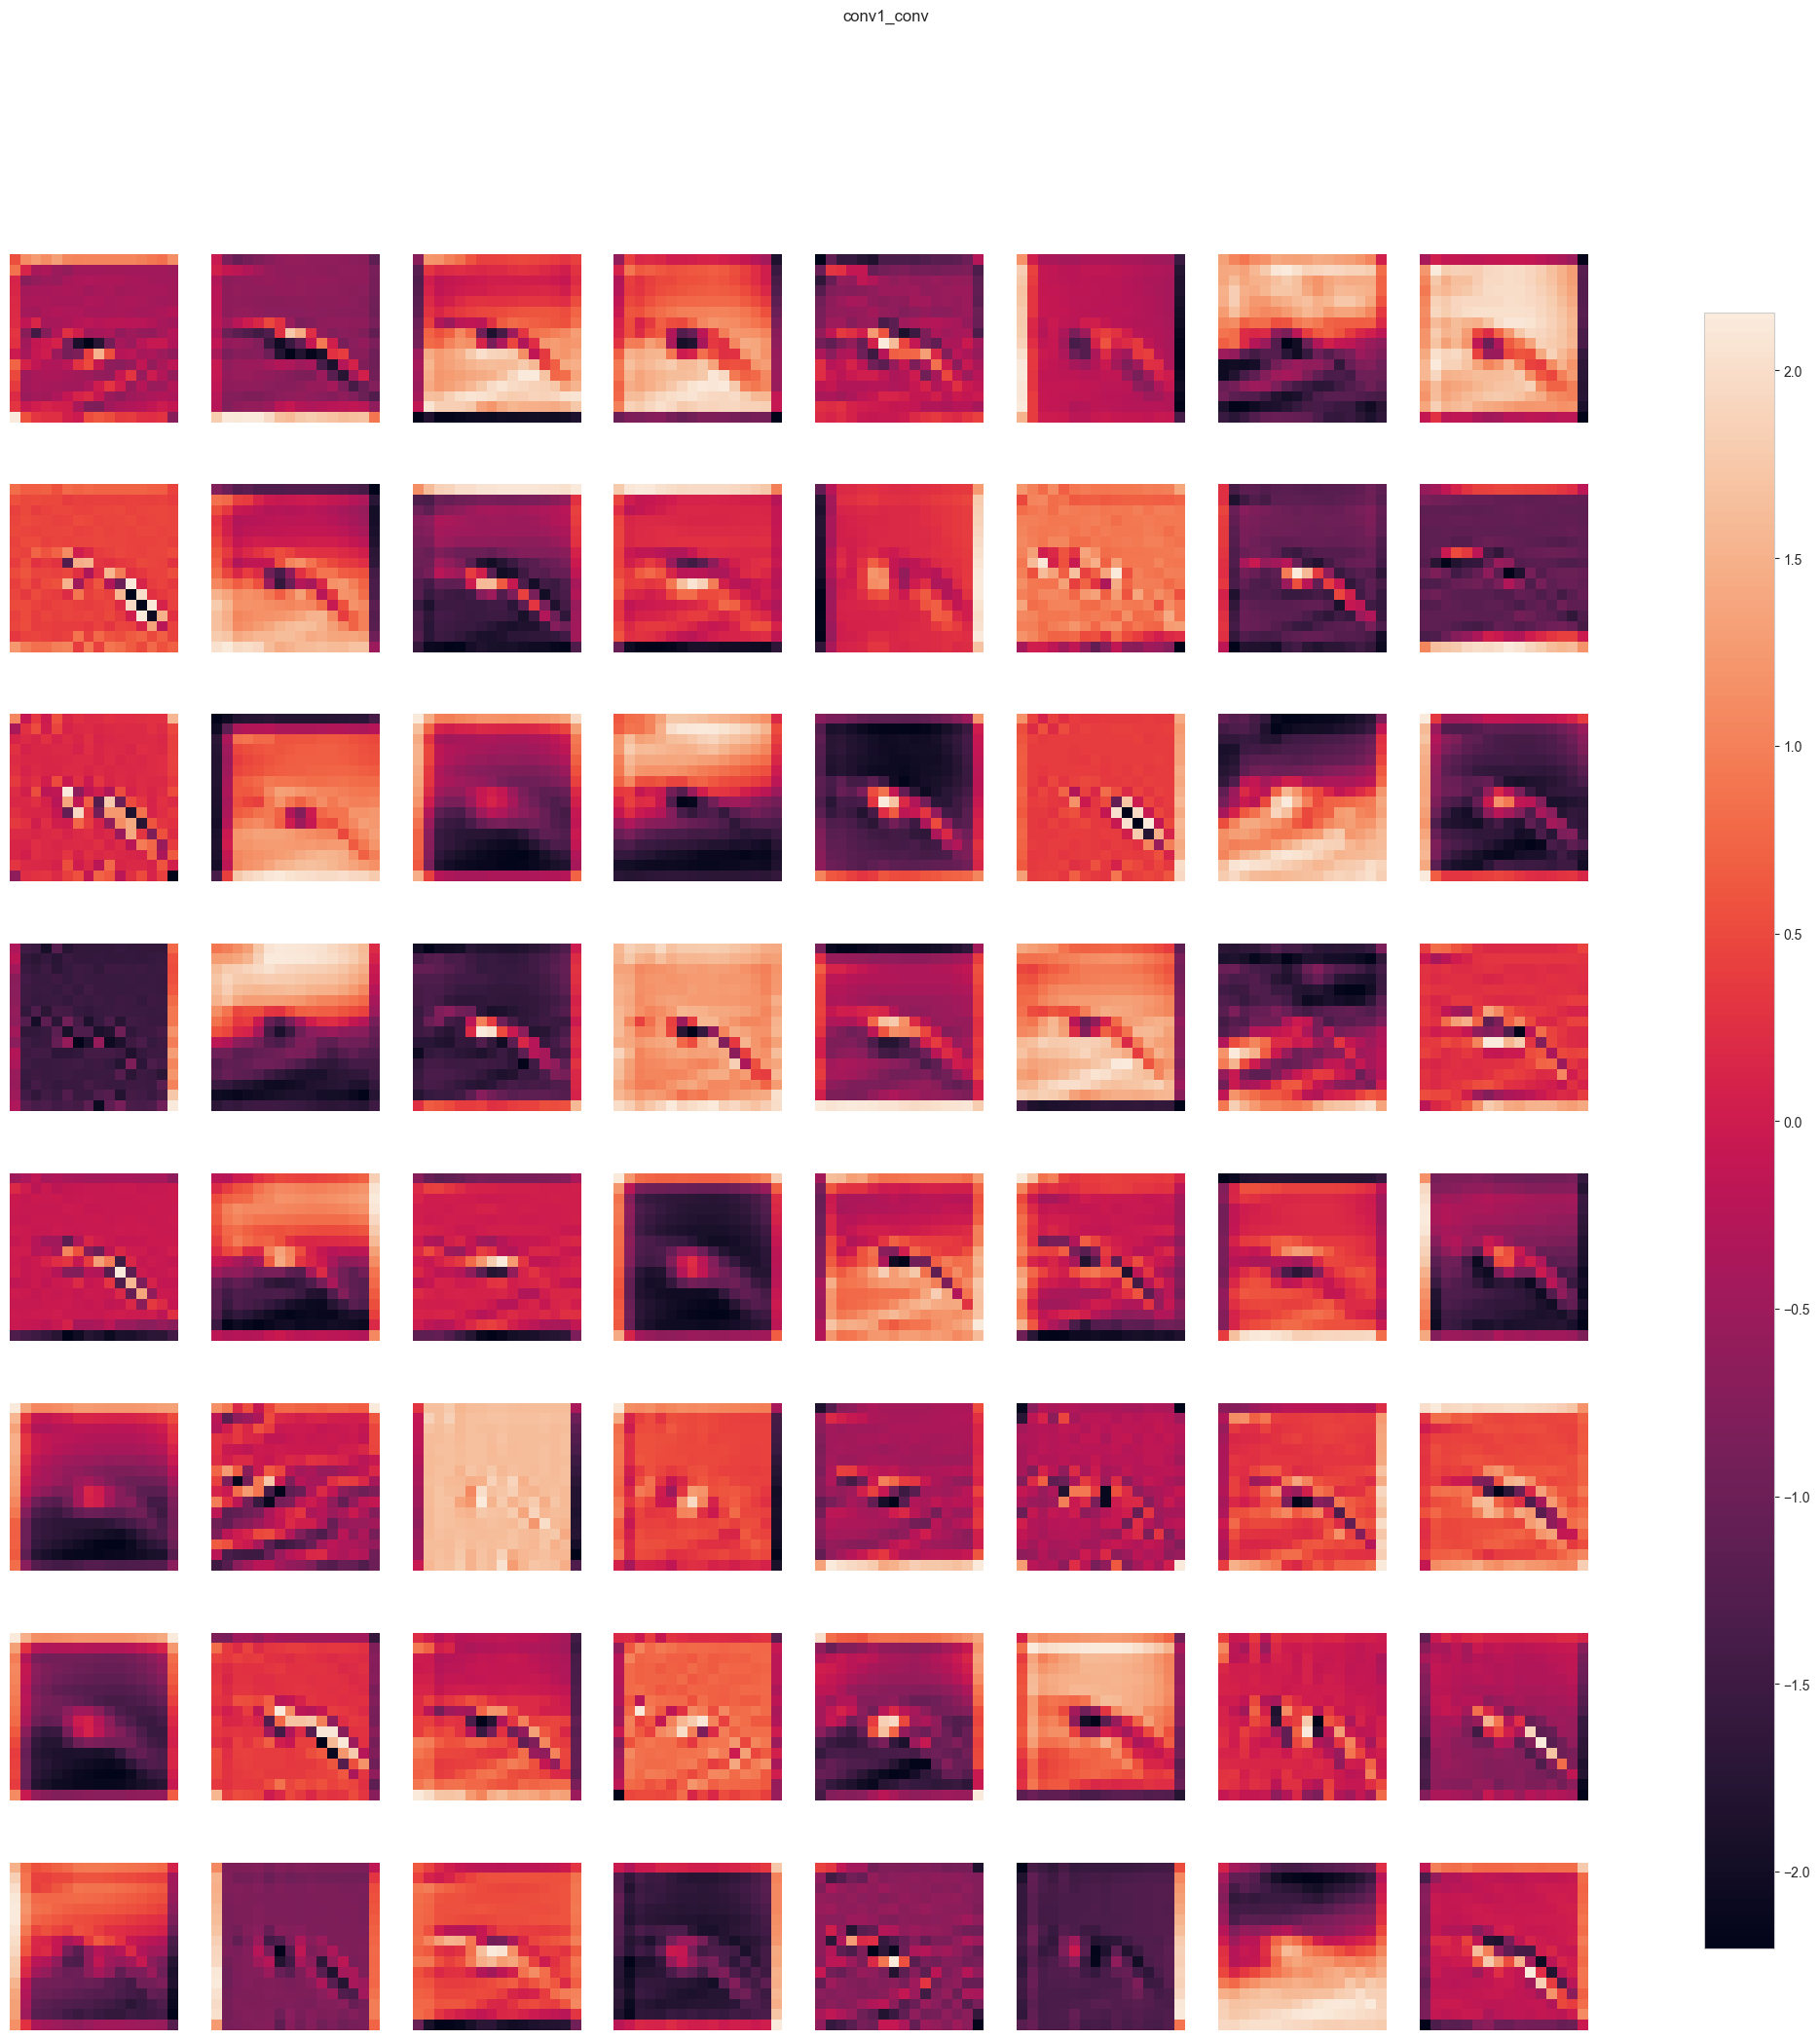

conv5_block3_out (1, 1, 1, 2048) 


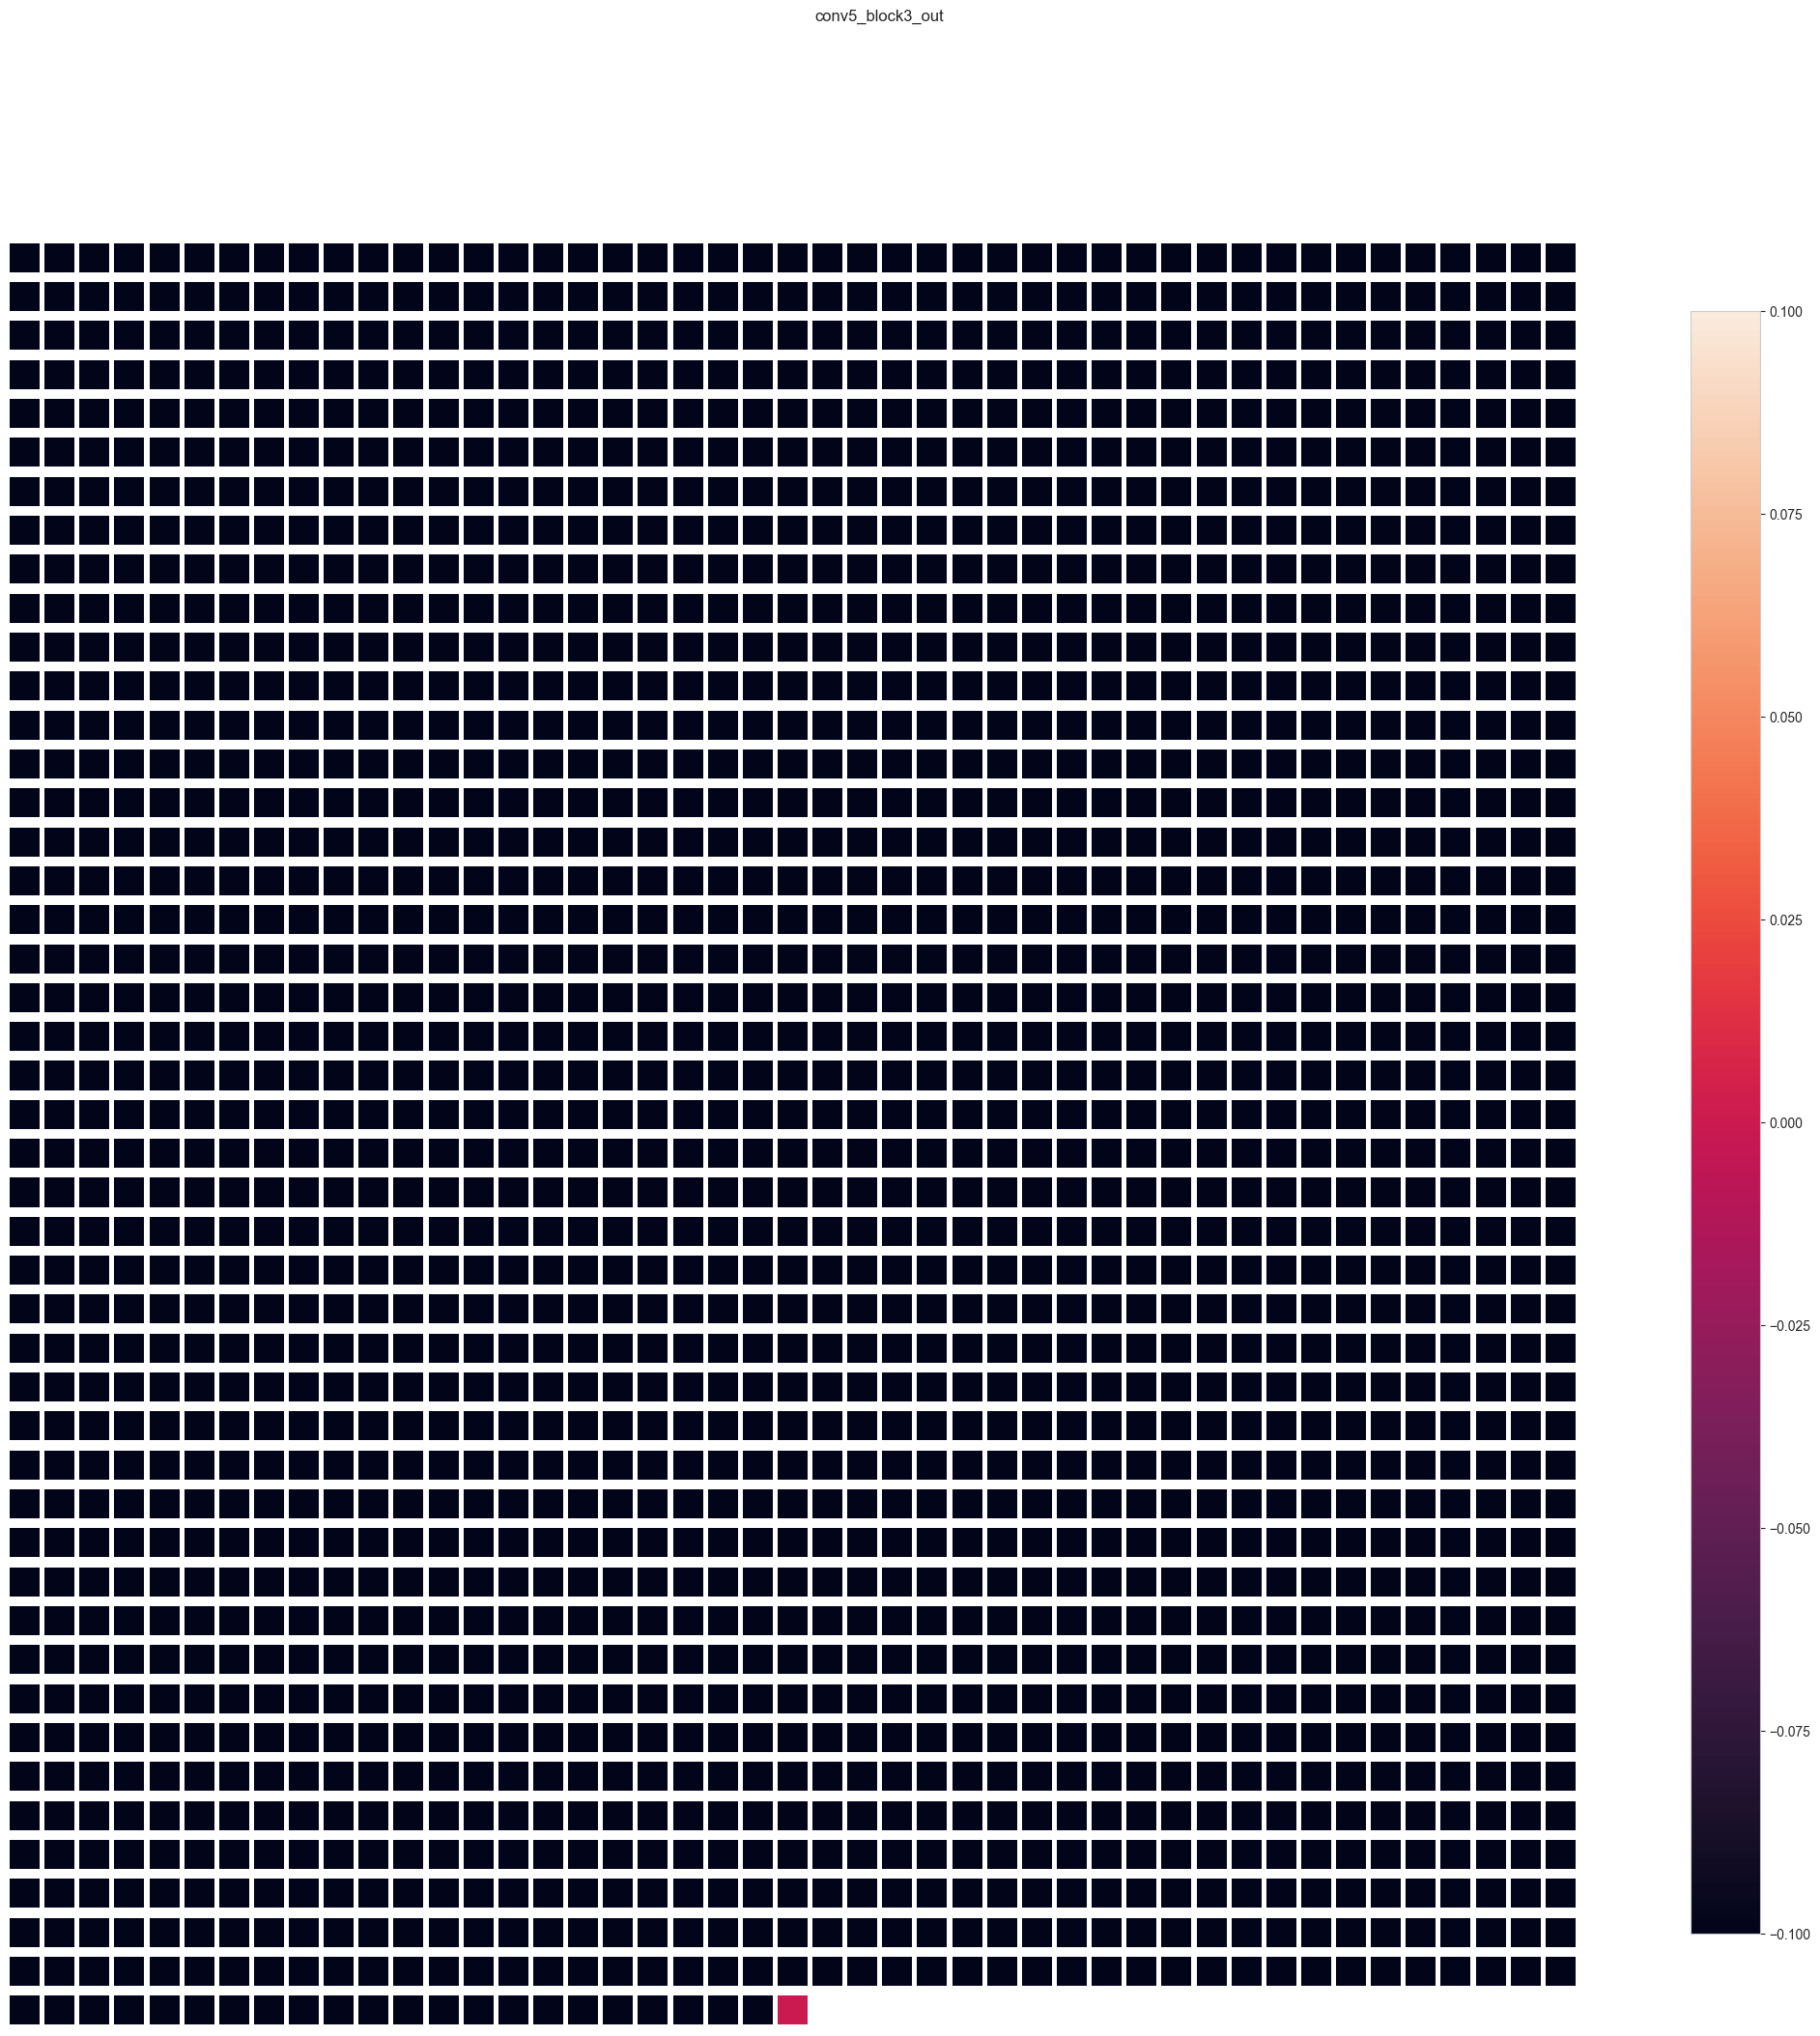

flatten_1 (1, 2048) 


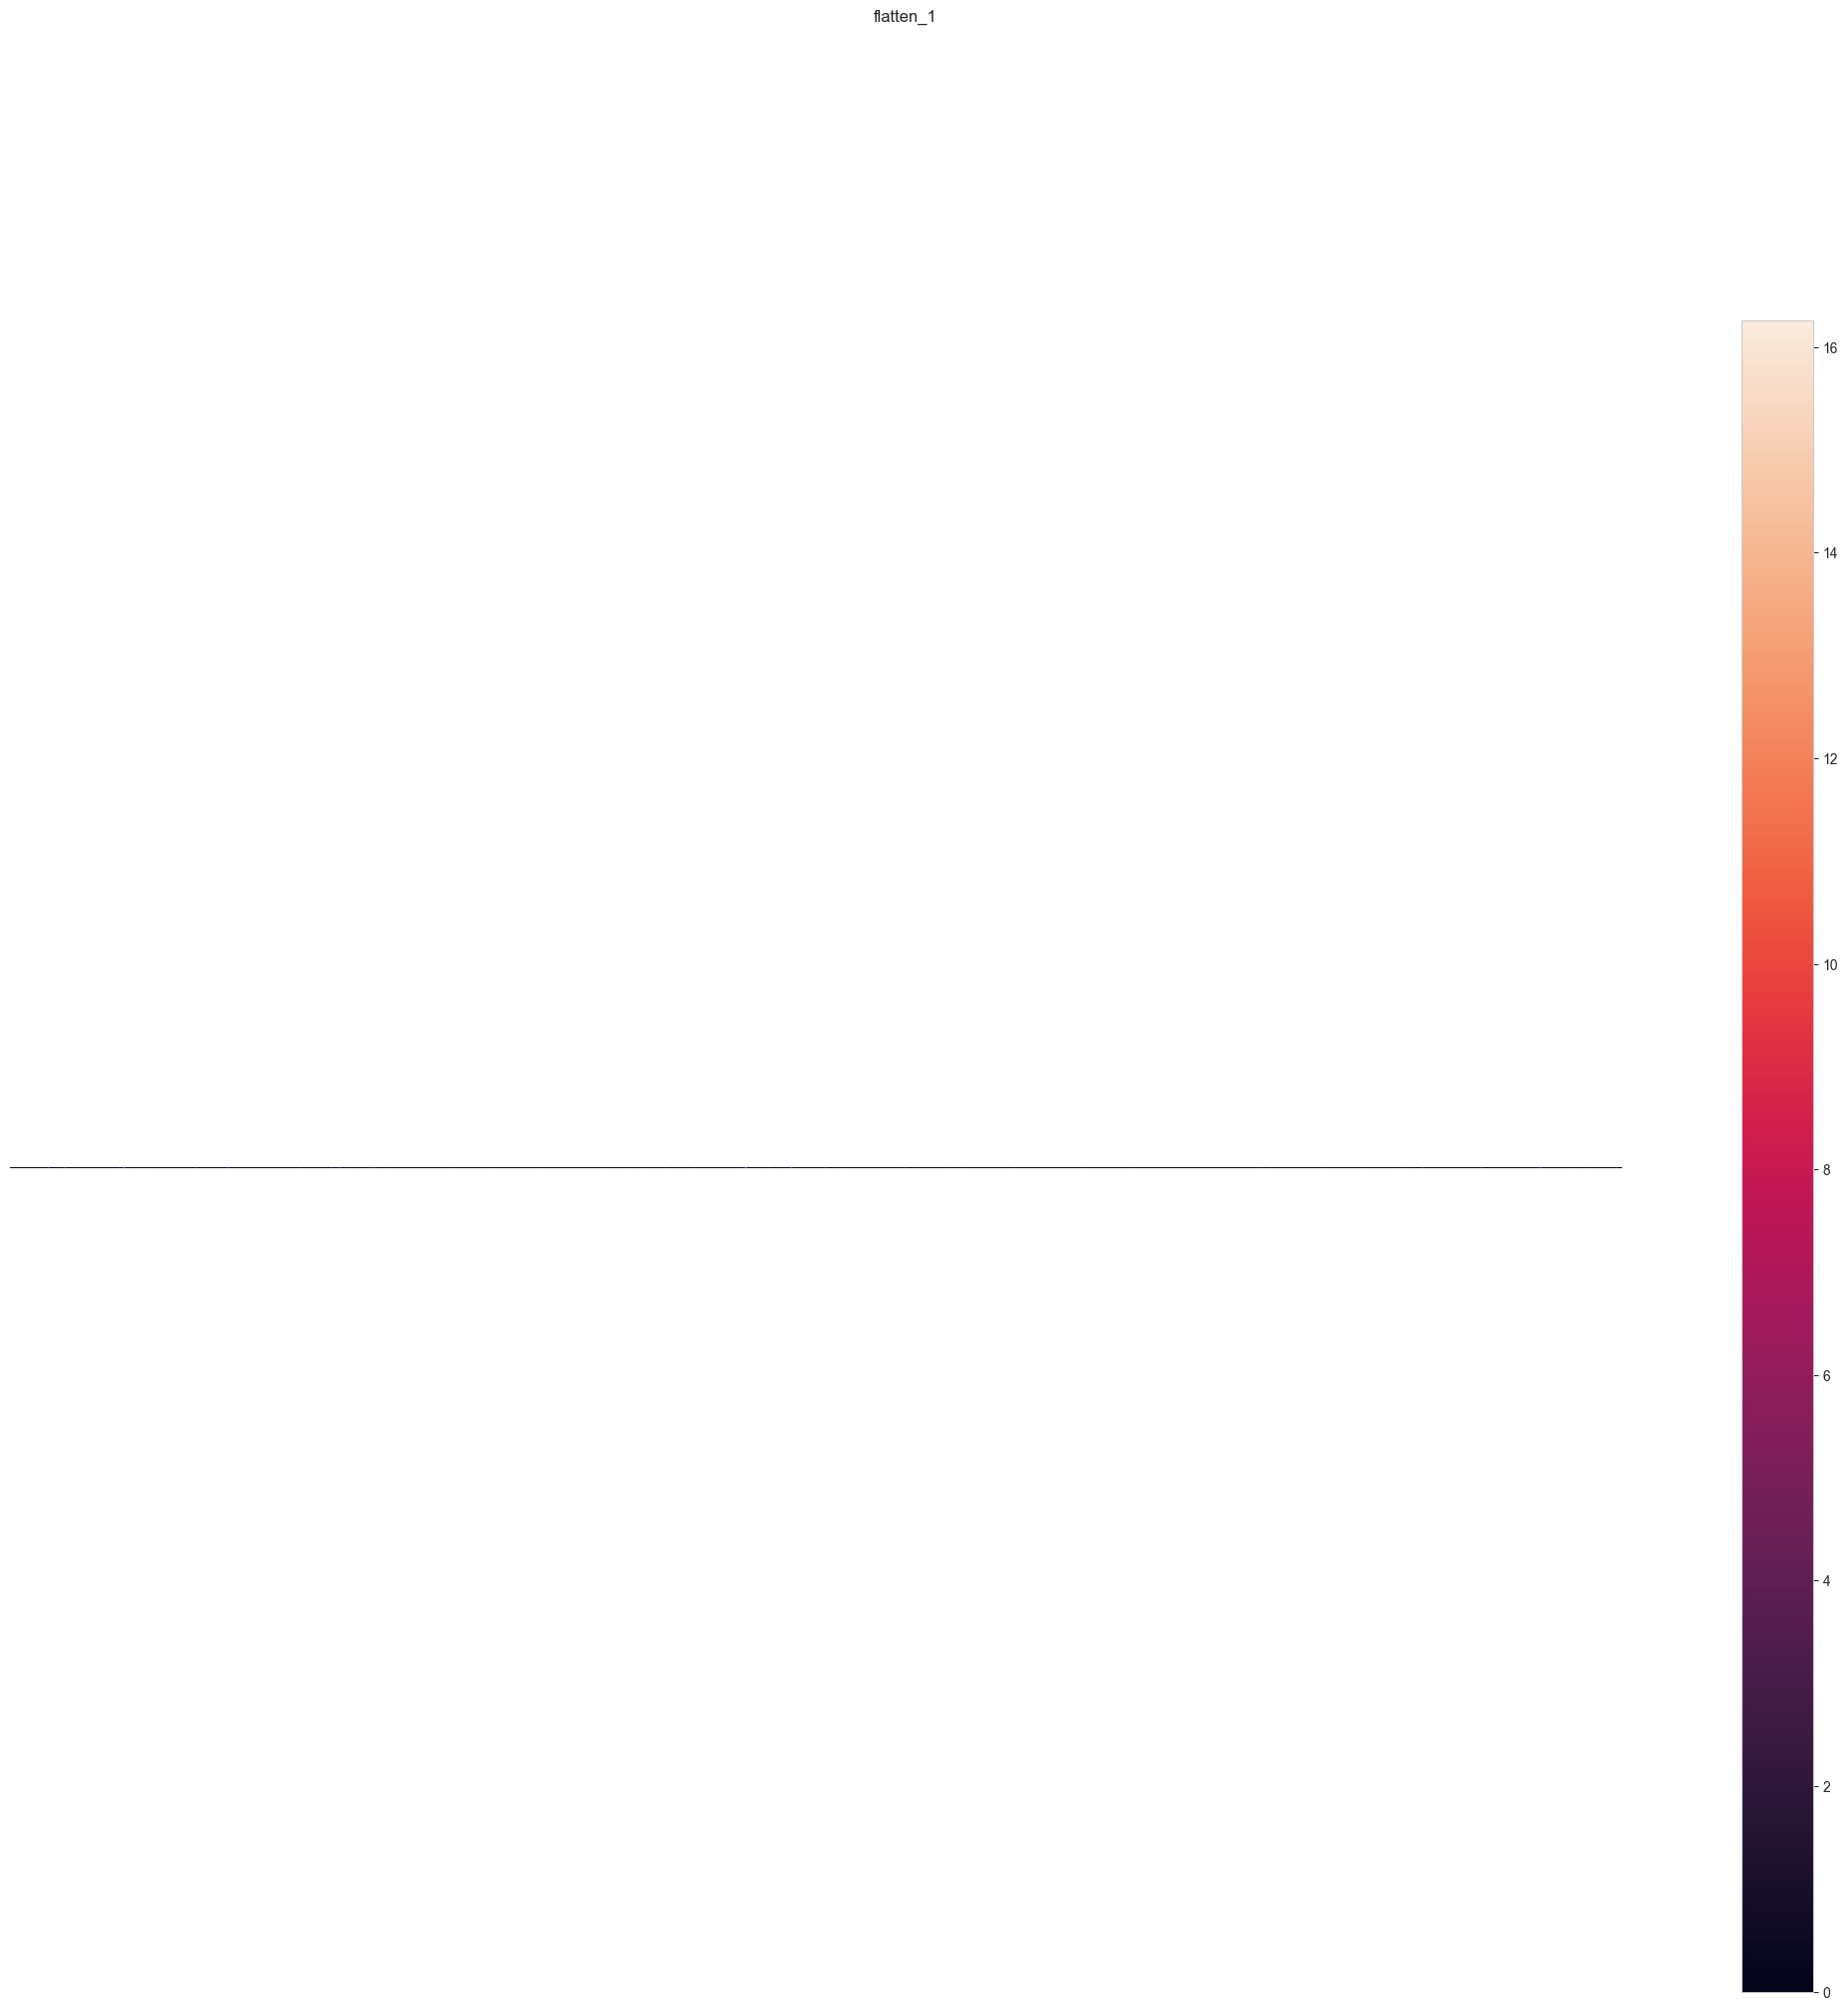

dense_2 (1, 200) 


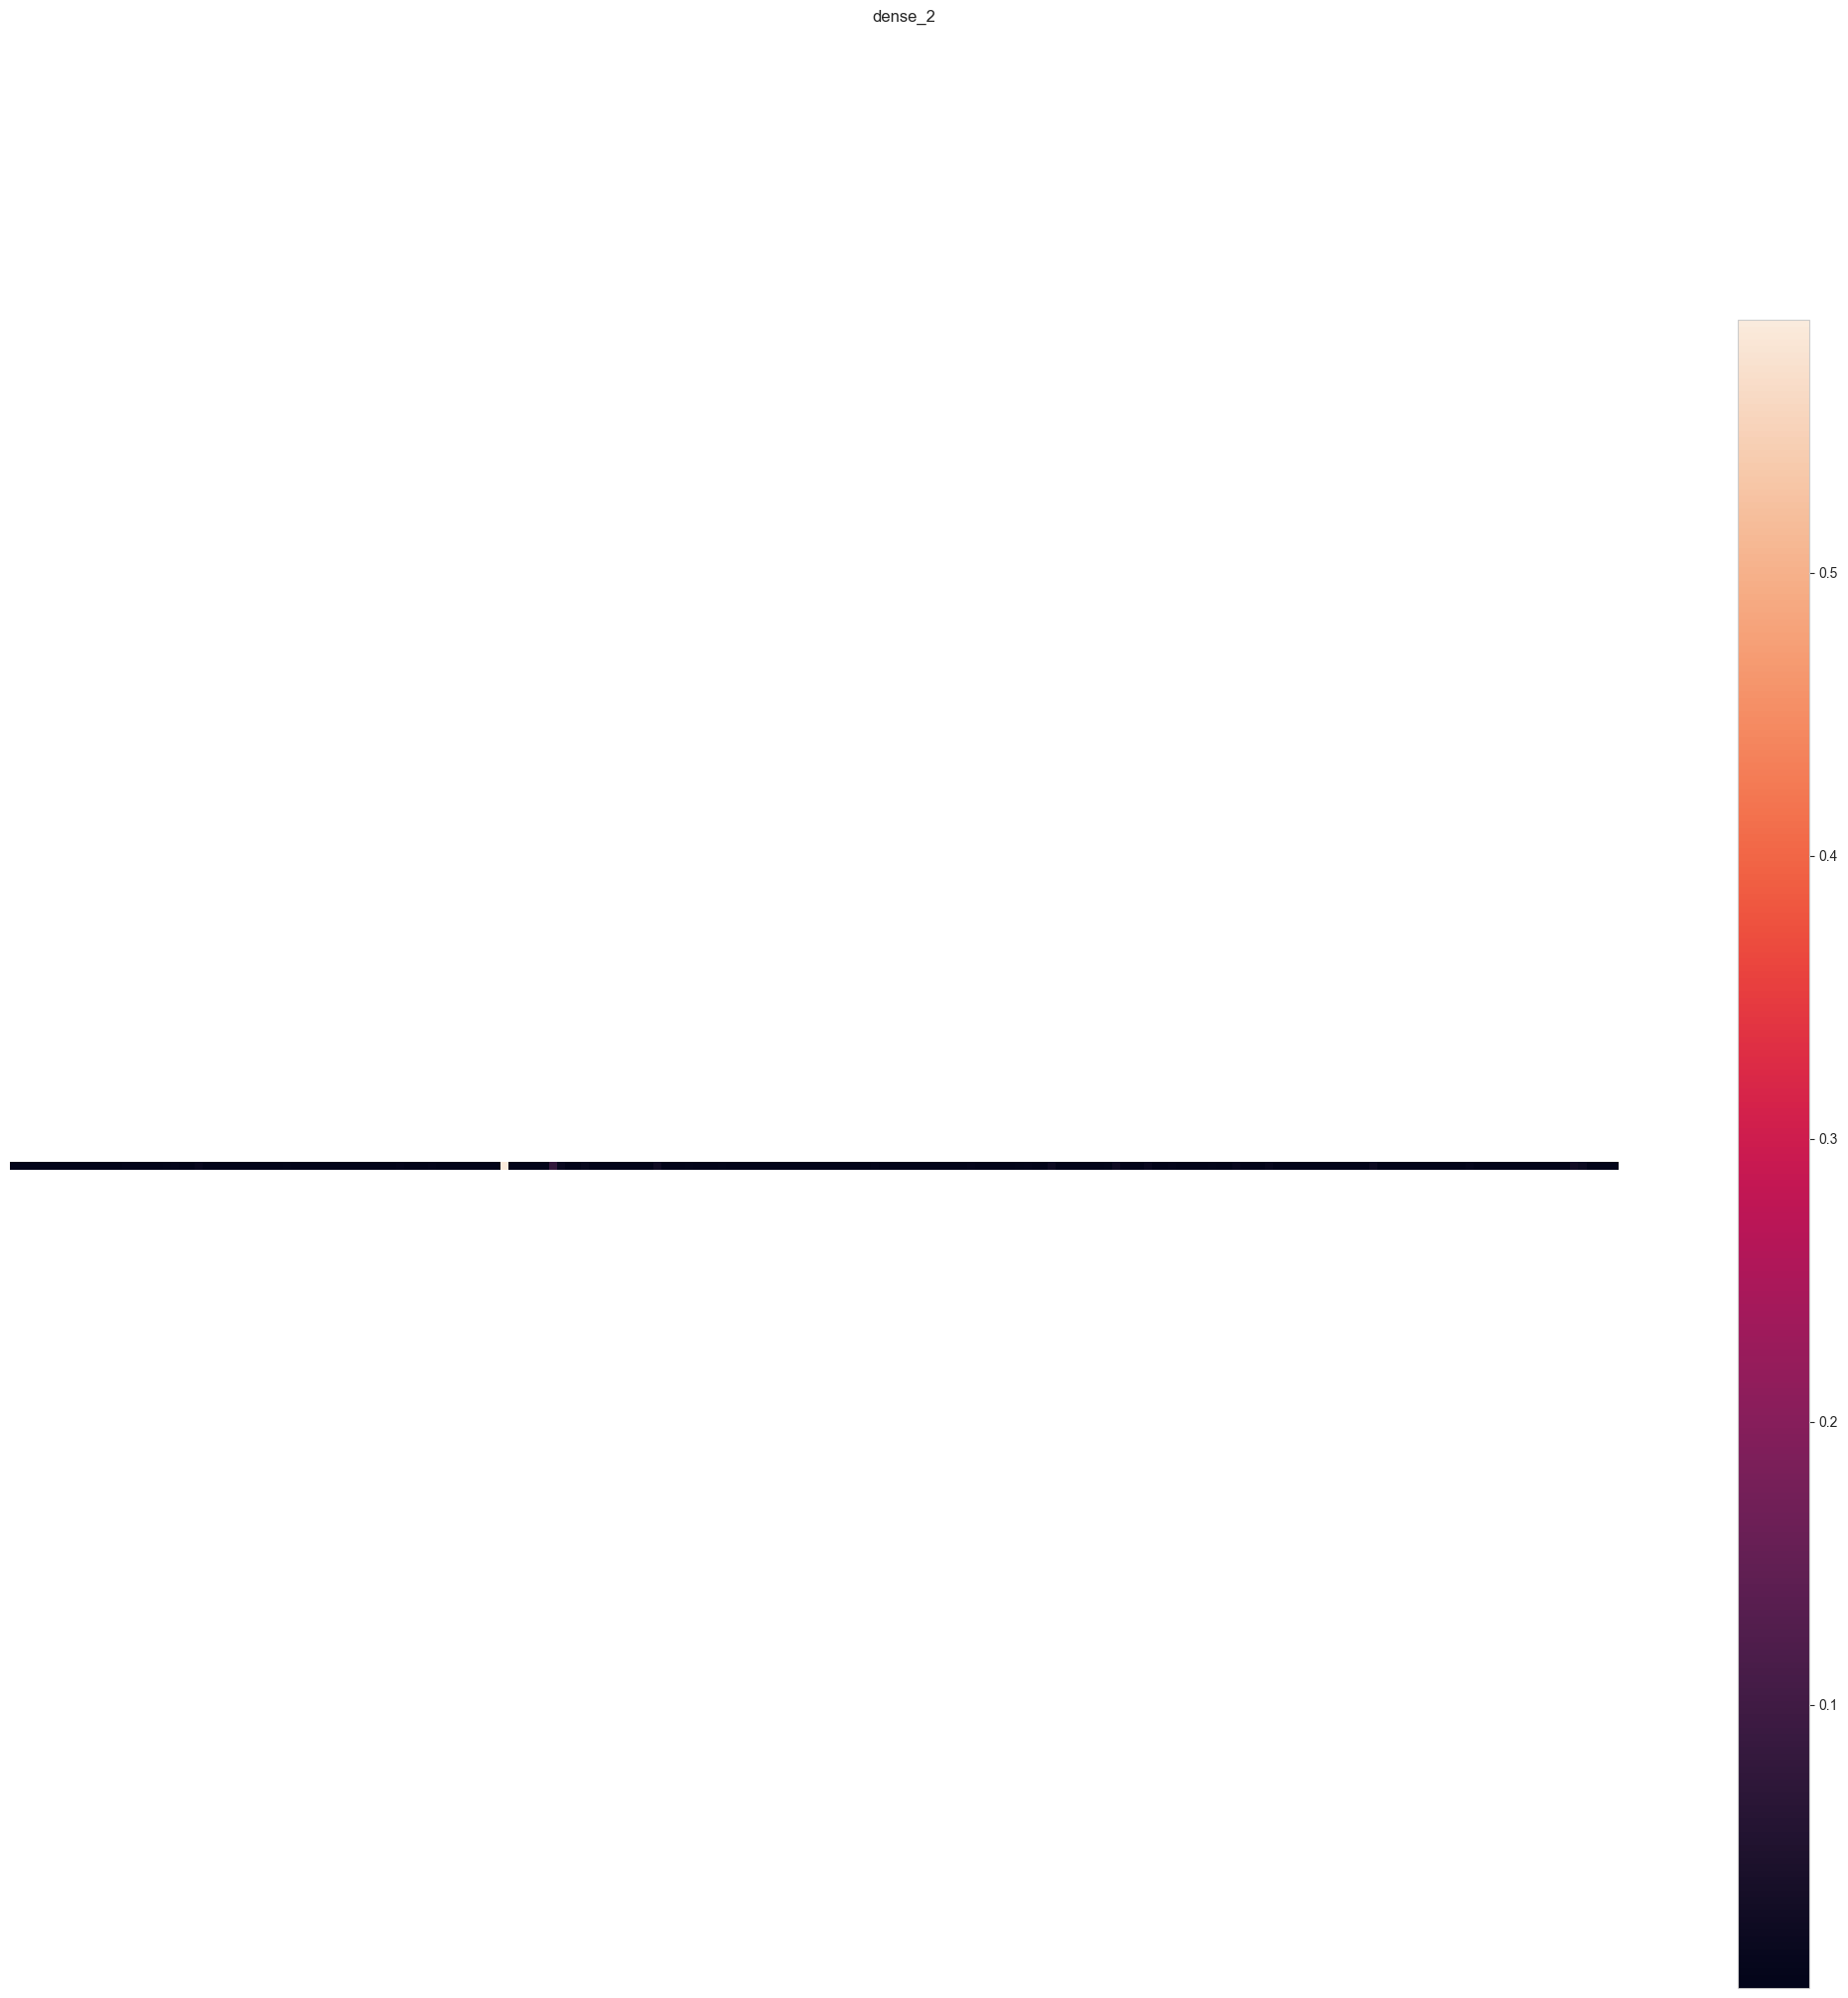

In [47]:
my_layers = [*list(activations.keys())[0:3], *list(activations.keys())[-3:]]
for name in list(activations.keys()):
    if name not in my_layers:
        activations.pop(name, None)
display_activations(activations, save=False, )